In [1]:
import dgl

In [1]:
import pandas as pd
import os

#turn off warnings
pd.options.mode.chained_assignment = None  # default='warn'

os.listdir('downstream_experiments/exports_2345')


DATASETS = [
 'pubmed',
 'co_photo',
 'wiki_cs',
 'co_cs',
 'chameleon',
 #'products',
 'actor',
 'co_computer',
 'arxiv',
 'squirrel',
 ]

In [2]:
link_results_path = os.path.join('downstream_experiments/exports_2345/link')
ssnc_results_path = os.path.join('downstream_experiments/exports_2345/ssnc')

link_results_df = pd.DataFrame()
label_results_df = pd.DataFrame()
node_assignment_results_df = pd.DataFrame()
node_clustering_results_df = pd.DataFrame()


overall_score_df = pd.DataFrame()
seed = 2345
for dataset in DATASETS:
    try:
        ds_link_df = pd.read_csv(os.path.join(link_results_path, dataset, 'link_prediction_report_df.csv'))
        ds_link_df['dataset'] = dataset
        curr_result_df = ds_link_df[['dataset', 'tensor_label', 'auc_mean','auc_std']]
        curr_result_df.columns = ['dataset', 'tensor_label', 'score_mean', 'score_std']
        curr_result_df['metric'] = 'auc'
        curr_result_df['downstream'] = 'link_prediction'
        #keep only columns with s2023 in tensor_label
        curr_result_df = curr_result_df[curr_result_df['tensor_label'].str.contains(f's{seed}')]
        curr_result_df['tensor_label'] = curr_result_df['tensor_label'].str.split("|").str[0].str.strip()
        overall_score_df = pd.concat([overall_score_df, curr_result_df])
    except Exception as e:
        # print stack
        print(e)
        print(f"link prediction results not found for {dataset}".upper())

    try:
        ds_label_df = pd.read_csv(os.path.join(ssnc_results_path, dataset, 'label_report_df.csv'))
        curr_result_df = ds_label_df.groupby('tensor_label').agg({'best_test_acc': ['mean', 'std']})
        curr_result_df.columns = ['_'.join(col).strip() for col in curr_result_df.columns.values]
        curr_result_df = curr_result_df.reset_index()
        curr_result_df['dataset'] = dataset
        curr_result_df = curr_result_df[['dataset', 'tensor_label', 'best_test_acc_mean', 'best_test_acc_std']]
        curr_result_df.columns = ['dataset', 'tensor_label', 'score_mean', 'score_std']
        curr_result_df['metric'] = 'acc'
        curr_result_df['downstream'] = 'label_prediction'
        curr_result_df = curr_result_df[curr_result_df['tensor_label'].str.contains(f's{seed}')]
        curr_result_df['tensor_label'] = curr_result_df['tensor_label'].str.split("|").str[0].str.strip()
        overall_score_df = pd.concat([overall_score_df, curr_result_df])
    except Exception as e:
        print(f"label prediction results not found for {dataset}".upper())

    try:
        ds_node_assignment_df = pd.read_csv(os.path.join(ssnc_results_path, dataset, 'node_assignment_report_df.csv'))
        curr_result_df = ds_node_assignment_df.groupby('tensor_label').agg({'best_test_acc': ['mean', 'std']})
        curr_result_df.columns = ['_'.join(col).strip() for col in curr_result_df.columns.values]
        curr_result_df = curr_result_df.reset_index()
        curr_result_df['dataset'] = dataset
        curr_result_df = curr_result_df[['dataset', 'tensor_label', 'best_test_acc_mean', 'best_test_acc_std']]
        curr_result_df.columns = ['dataset', 'tensor_label', 'score_mean', 'score_std']
        curr_result_df['metric'] = 'acc'
        curr_result_df['downstream'] = 'node_assignment'
        curr_result_df = curr_result_df[curr_result_df['tensor_label'].str.contains(f's{seed}')]
        curr_result_df['tensor_label'] = curr_result_df['tensor_label'].str.split("|").str[0].str.strip()
        overall_score_df = pd.concat([overall_score_df, curr_result_df])
    except Exception as e:
        print(f"node assignment results not found for {dataset}".upper())
    '''
    try:
        ds_node_clustering_df = pd.read_csv(os.path.join(ssnc_results_path, dataset, 'node_clustering_report_df.csv'))
        curr_result_df = ds_node_clustering_df.groupby('tensor_label').agg({'nmi': ['mean', 'std']})
        curr_result_df.columns = ['_'.join(col).strip() for col in curr_result_df.columns.values]
        curr_result_df = curr_result_df.reset_index()
        curr_result_df['dataset'] = dataset
        curr_result_df = curr_result_df[['dataset', 'tensor_label', 'nmi_mean', 'nmi_std']]
        curr_result_df.columns = ['dataset', 'tensor_label', 'score_mean', 'score_std']
        curr_result_df['metric'] = 'nmi'
        curr_result_df['downstream'] = 'node_clustering'
        curr_result_df = curr_result_df[curr_result_df['tensor_label'].str.contains(f's{seed}')]
        curr_result_df['tensor_label'] = curr_result_df['tensor_label'].str.split("|").str[0].str.strip()
        overall_score_df = pd.concat([overall_score_df, curr_result_df])
    except Exception as e:
        print(f"node clustering results not found for {dataset}".upper())
    '''

overall_score_df['seed'] = seed

# calculate average score for dataset, tensor_label
overall_score_df['score_mean'] = overall_score_df['score_mean'].astype(float)
overall_score_df['score_std'] = overall_score_df['score_std'].astype(float)
overall_score_aggr_df = overall_score_df.groupby(['dataset', 'tensor_label']).agg({'score_mean': 'mean', 'score_std': 'mean'}).reset_index()
overall_score_aggr_df['seed'] = seed
overall_score_aggr_df['downstream'] = 'aggr'
overall_score_aggr_df.columns = ['dataset', 'tensor_label', 'score_mean', 'score_std', 'seed', 'downstream']
# concat
overall_score_df = pd.concat([overall_score_df, overall_score_aggr_df])
overall_score_df.shape
print(overall_score_df)
overall_score_df.to_csv('downstream_experiments/overall_score_df.csv', index=False)

    dataset             tensor_label  score_mean  score_std metric  \
0    pubmed                      VAE    0.771536   0.024580    auc   
1    pubmed                   p_link    0.814990   0.037750    auc   
2    pubmed               StandardAE    0.705188   0.016022    auc   
3    pubmed                no_pareto    0.795681   0.023579    auc   
4    pubmed  pca single_task_stacked    0.887355   0.002973    auc   
..      ...                      ...         ...        ...    ...   
85  wiki_cs                   p_ming    0.794993   0.015651    NaN   
86  wiki_cs                  p_minsg    0.792153   0.009162    NaN   
87  wiki_cs                  p_recon    0.809256   0.009906    NaN   
88  wiki_cs                   pareto    0.803851   0.010403    NaN   
89  wiki_cs  pca single_task_stacked    0.854845   0.003779    NaN   

         downstream  seed  
0   link_prediction  2345  
1   link_prediction  2345  
2   link_prediction  2345  
3   link_prediction  2345  
4   link_prediction

In [3]:
data = pd.read_csv('downstream_experiments/overall_score_df.csv')

data

,dataset,tensor_label,score_mean,score_std,metric,downstream,seed
0,pubmed,VAE,0.771536,0.024580,auc,link_prediction,2345
1,pubmed,p_link,0.814990,0.037750,auc,link_prediction,2345
2,pubmed,StandardAE,0.705188,0.016022,auc,link_prediction,2345
3,pubmed,no_pareto,0.795681,0.023579,auc,link_prediction,2345
4,pubmed,pca single_task_stacked,0.887355,0.002973,auc,link_prediction,2345
...,...,...,...,...,...,...,...
355,wiki_cs,p_ming,0.794993,0.015651,NaN,aggr,2345
356,wiki_cs,p_minsg,0.792153,0.009162,NaN,aggr,2345
357,wiki_cs,p_recon,0.809256,0.009906,NaN,aggr,2345
358,wiki_cs,pareto,0.803851,0.010403,NaN,aggr,2345


In [4]:
markdown_out = ""

for downstream in data['downstream'].unique():
    print("==============" , downstream, "===============")
    markdown_out += f"# {downstream}\n"
    curr_df = data[data['downstream'] == downstream]
    # pivot the table such that rows are tensor_labels, columns are datasets_mean, datasets_std
    pivot_df = curr_df.pivot(index='tensor_label', columns='dataset', values=['score_mean'])
    pivot_df = pivot_df.reset_index()
    
    # flatten the multi-index columns
    pivot_df.columns = ['_'.join(col).strip() for col in pivot_df.columns.values]
    pivot_df = pivot_df.reset_index()

    pivot_df['mean_overll_score'] = pivot_df.filter(like='mean').mean(axis=1)

    # sort by mean_overall_score
    pivot_df = pivot_df.sort_values(by='mean_overll_score', ascending=False)
    
    # add to markdown
    markdown_out += pivot_df.to_markdown(index=False)
    markdown_out += "\n\n"


# export to markdown
with open('downstream_experiments/overall_score_df.md', 'w') as f:
    f.write(markdown_out)

============== link_prediction ===============
============== label_prediction ===============
============== node_assignment ===============
============== aggr ===============


In [1]:
## For ablations
import pandas as pd
ABL_df = pd.read_csv('downstream_experiments/exports_ABL_2345/ssnc/chameleon/label_report_df.csv') 

ABL_df = ABL_df.groupby('tensor_label').agg({'best_test_acc': ['mean', 'std']})

ABL_df

best_test_acc          
                                                    mean       std
tensor_label                                                      
pareto_1024_1024_1024_1024_256 | s2345          0.664035  0.012051
pareto_1024_1024_1024_256 | s2345               0.681579  0.015920
pareto_1024_1024_256 | s2345                    0.704825  0.022396
pareto_1024_256 | s2345                         0.712561  0.003202
pareto_2024_2024_256 | s2345                    0.698246  0.016010
pareto_2024_256 | s2345                         0.712175  0.005557
pareto_512_512_512_512_256 | s2345              0.675000  0.020654
pareto_512_512_512_512_512_256 | s2345          0.671491  0.015146
pareto_512_512_512_512_512_512_256 | s2345      0.658333  0.016873

In [5]:
## t-sne plots for embeddings

import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns
from downstream_node_classification import get_target_data, aggregate_tensors
from sklearn.model_selection import StratifiedShuffleSplit

import torch

dataset = 'chameleon'

In [6]:
labels, ids = get_target_data(dataset, target='label')
labels = labels.cpu().numpy()
print("Number of unique labels: ", len(np.unique(labels)))



# read MEGA tensor
MEGA_t = torch.load(f"scripts_2/SSL_training_2345_ssnc/{dataset}/single_task_stacked/{dataset}_ssnc_s2345_single_task_stacked/X.pt")
print("Shape of MEGA tensor: ", MEGA_t.shape)
MEGA_t = aggregate_tensors(MEGA_t, aggr_strategy='pca')
MEGA_np = MEGA_t.cpu().numpy()
print("Shape of MEGA np after aggregation: ", MEGA_np.shape)

# read Pareto tensor
Pareto_t = torch.load(f"scripts_2/SSL_training_2345_ssnc/chameleon/pareto/chameleon_ssnc_s2345['p_link', 'p_recon', 'p_ming', 'p_decor', 'p_minsg']_k-order_prelu_hid_dim_[512, 256]_optim_adamw_inter_dim_0_pred_dim_512_lr_5e-05_decay_1e-05_l2_/X.pt")
Pareto_np = Pareto_t.cpu().numpy()
print("Shape of Pareto np: ", Pareto_np.shape)

Number of unique labels:  5
Shape of MEGA tensor:  torch.Size([5, 2277, 256])
Shape of MEGA np after aggregation:  (2277, 256)
Shape of Pareto np:  (2277, 256)


In [7]:
# Define the stratified shuffle split object
sss = StratifiedShuffleSplit(n_splits=1, test_size=1000, random_state=42)

# Perform the split
for train_index, test_index in sss.split(MEGA_np, labels):
    MEGA_subsample = MEGA_np[test_index]
    Pareto_subsample = Pareto_np[test_index]
    labels_subsample = labels[test_index]


Silhouette score for MEGA t-SNE: -0.09
Silhouette score for Pareto t-SNE: -0.10


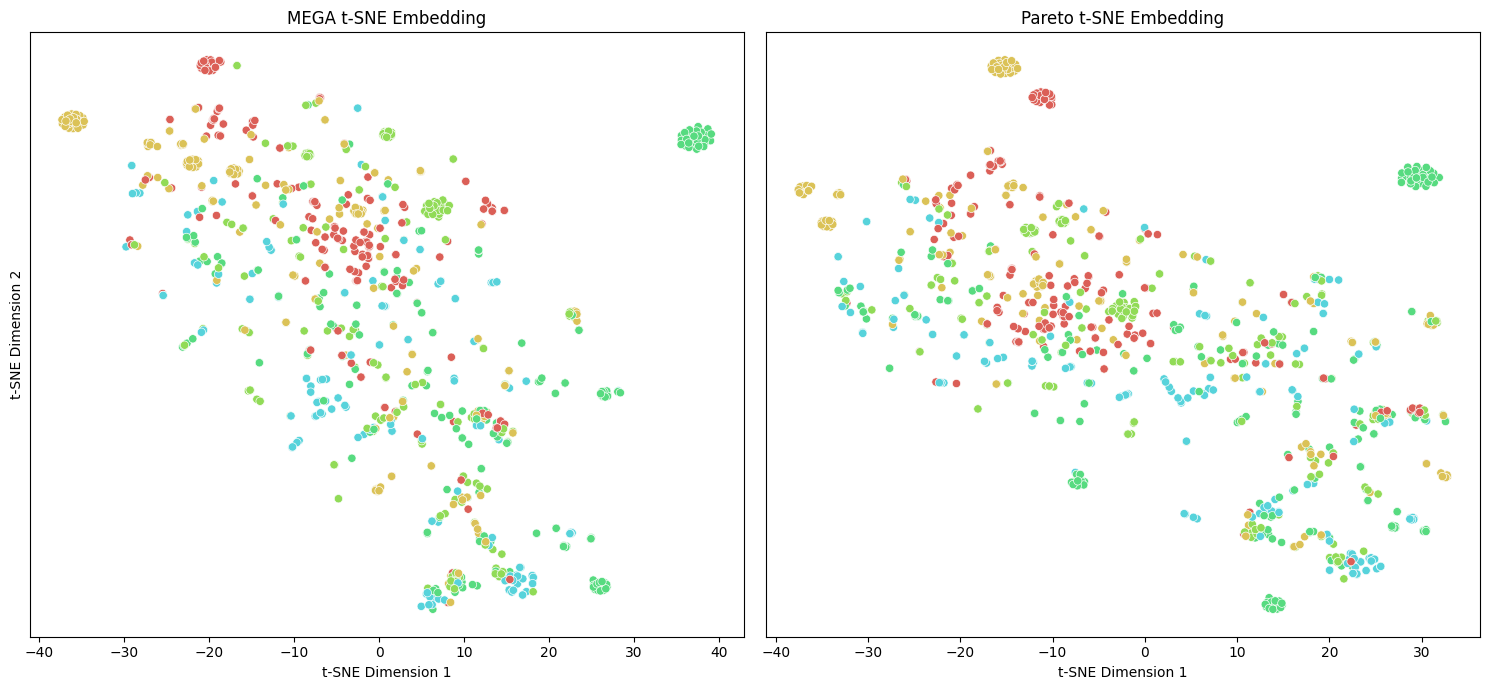

In [11]:
# Perform t-SNE on both embeddings
tsne = TSNE(n_components=2, random_state=42)
MEGA_tsne = tsne.fit_transform(MEGA_subsample)
Pareto_tsne = tsne.fit_transform(Pareto_subsample)

# Create a 1x2 plot
fig, axes = plt.subplots(1, 2, figsize=(15, 7))


_pallet = sns.color_palette("hls", 8)

# MEGA t-SNE plot
sns.scatterplot(x=MEGA_tsne[:, 0], y=MEGA_tsne[:, 1], hue=labels_subsample, palette=_pallet, ax=axes[0])
axes[0].set_title('MEGA t-SNE Embedding')
axes[0].set_xlabel('t-SNE Dimension 1')
axes[0].set_ylabel('t-SNE Dimension 2')

# Pareto t-SNE plot
sns.scatterplot(x=Pareto_tsne[:, 0], y=Pareto_tsne[:, 1], hue=labels_subsample, palette=_pallet, ax=axes[1])
axes[1].set_title('Pareto t-SNE Embedding')
axes[1].set_xlabel('t-SNE Dimension 1')
#axes[1].set_ylabel('t-SNE Dimension 2')
#turn off legend and x,y ticks


for i in range(2):
    axes[i].legend_.remove()
    axes[i].set_yticks([])
    axes[i].set_yticklabels([])

from sklearn.metrics import silhouette_score

MEGA_silhouette = silhouette_score(MEGA_tsne, labels_subsample)
Pareto_silhouette = silhouette_score(Pareto_tsne, labels_subsample)

print(f"Silhouette score for MEGA t-SNE: {MEGA_silhouette:.2f}")
print(f"Silhouette score for Pareto t-SNE: {Pareto_silhouette:.2f}")

# Show the plot
plt.tight_layout()
plt.show()


In [5]:
datasets = [
    'co_cs', 'co_phy',
     'products',
     'chameleon',  'actor',

    'pubmed',
 'co_photo',
 'wiki_cs',
 'co_computer',

 'squirrel',
   'arxiv',]


target_labels = ['label', 'node_assignment']#, 'node_clustering']

for dataset in datasets:
    for target_label in target_labels:
        if target_label in ['node_assignment', 'label']:
            print("--- Results for dataset: ", dataset, " target_label: ", target_label)
            print(dataset, target_label)
            df = pd.read_csv(f'downstream_experiments/exports_2/{dataset}/{target_label}_report_df.csv')
            print(df.shape)

            # groupny tensor_label, show average and std of best_test_acc and best_fold_train_acc
            aggrd_df = df.groupby('tensor_label').agg({'best_test_acc': ['mean', 'std'], 'best_fold_train_acc': ['mean', 'std']})

            # sort by best_test_acc
            aggrd_df = aggrd_df.sort_values(('best_test_acc', 'mean'), ascending=False)

            # select columns related to best_test_acc
            aggrd_df = aggrd_df[[('best_test_acc', 'mean'), ('best_test_acc', 'std')]]

            # print head without limiting the tensro_label column length (show full text)
            # show as a markdow table
            print(aggrd_df.head(100).to_markdown())
            print("\n\n\n\n")
        elif target_label == 'node_clustering':
            print("--- Results for dataset: ", dataset, " target_label: ", target_label)
            print(dataset, target_label)
            df = pd.read_csv(f'downstream_experiments/exports_2/{dataset}/{target_label}_report_df.csv')
            print(df.shape)

            # groupny tensor_label, show average and std of best_test_acc and best_fold_train_acc
            aggrd_df = df.groupby('tensor_label').agg({'nmi': ['mean', 'std']})
            # sort by best_test_acc
            aggrd_df = aggrd_df.sort_values(('nmi', 'mean'), ascending=False)

            # select columns related to best_test_acc
            aggrd_df = aggrd_df[[('nmi', 'mean'), ('nmi', 'std')]]

            # print head without limiting the tensro_label column length (show full text)
            # show as a markdow table
            print(aggrd_df.head(100).to_markdown())
            print("\n\n\n\n")

        else:
            raise ValueError(f"Unknown target_label: {target_label}")

     

--- Results for dataset:  co_cs  target_label:  label
co_cs label
(45, 14)
| tensor_label                             |   ('best_test_acc', 'mean') |   ('best_test_acc', 'std') |
|:-----------------------------------------|----------------------------:|---------------------------:|
| 5-task single encoder pareto | s2023     |                    0.92637  |                 0.00321511 |
| 5-task single encoder nopareto | s2023   |                    0.925116 |                 0.00427108 |
| pca Single task (5-task) stacked | s2023 |                    0.922225 |                 0.00412403 |
| Single task (5-task) stacked AE | s2023  |                    0.920807 |                 0.0033984  |
| p_ming | s2023                           |                    0.918462 |                 0.00252158 |
| p_recon | s2023                          |                    0.904281 |                 0.00551844 |
| p_minsg | s2023                          |                    0.867467 |                 0.

In [2]:
import dgl
import torch
from dgl.data import CoraGraphDataset
from dgl.dataloading import GraphDataLoader, MultiLayerNeighborSampler, as_edge_prediction_sampler


In [45]:
def link_prediction_data_process(outputs_from_dataloader, device, mask_ratio=0.4):
    input_nodes, pos_pair_graph, neg_pair_graph, sg = outputs_from_dataloader
    pos_edges = pos_pair_graph.edges()
    neg_edges = neg_pair_graph.edges()
    pos_u, pos_v = pos_edges[0], pos_edges[1]
    neg_u, neg_v = neg_edges[0], neg_edges[1]
    sg[0].ndata['feat']['_N'] = torch.nn.functional.dropout(sg[0].ndata['feat']['_N'], mask_ratio)
    return sg, pos_u, pos_v, neg_u, neg_v

# Load a sample graph (Cora dataset for simplicity)
g = src.data.load_data('chameleon', 'pretrain_labels', False, 'none', 'random', hetero_graph_path='hetero_graphs')


# print the number of nodes and edges
print(g.number_of_nodes())
print(g.number_of_edges())
# Define the neighbor sampler
sampler = MultiLayerNeighborSampler([15, 10, 5])

# Define the edge prediction sampler with negative sampling
link_negative_ratio = 1  # Example ratio
link_sampler = as_edge_prediction_sampler(
    sampler, 
    negative_sampler=dgl.dataloading.negative_sampler.GlobalUniform(link_negative_ratio)
)

indices = torch.randperm(100)
indices = torch.randperm(indices[0])[:len(indices)*10]

initial_output = link_sampler.sample(g, indices)
sg = initial_output[3]
print("Type of sg[0]", type(sg[0]))
print("!!!", sg[0].ndata['feat']['_N'])
p_link_output = link_prediction_data_process(initial_output, 'cuda')
sg, pos_u, pos_v, neg_u, neg_v = p_link_output

print("sg :", sg)
#print("pos_u :", pos_u, pos_u.shape)
#print("pos_v :", pos_v, pos_v.shape)
#print("neg_u :", neg_u, neg_u.shape)
#print("neg_v :", neg_v, neg_v.shape)
#print("------------------_")
#print(p_link_output)

2277
65019
Type of sg[0] <class 'dgl.heterograph.DGLBlock'>
!!! tensor([[-0.0210, -0.1032, -0.0419,  ..., -0.0893, -0.0867, -0.0728],
        [-0.0210, -0.1032, -0.0419,  ..., -0.0893, -0.0867, -0.0728],
        [-0.0210, -0.1032, -0.0419,  ..., -0.0893, -0.0867, -0.0728],
        ...,
        [-0.0210, -0.1032, -0.0419,  ..., -0.0893, -0.0867, -0.0728],
        [-0.0210, -0.1032, -0.0419,  ..., -0.0893, -0.0867, -0.0728],
        [-0.0210, -0.1032, -0.0419,  ..., -0.0893, -0.0867, -0.0728]])
sg : [Block(num_src_nodes=1887, num_dst_nodes=1255, num_edges=15884), Block(num_src_nodes=1255, num_dst_nodes=361, num_edges=3281), Block(num_src_nodes=361, num_dst_nodes=111, num_edges=530)]


In [36]:
sg[0].ndata['feat']

{'_N': tensor([[-0.0210, -0.1032, -0.0419,  ..., -0.0893, -0.0867, -0.0728],
         [-0.0210, -0.1032, -0.0419,  ..., -0.0893, -0.0867, -0.0728],
         [-0.0210, -0.1032, -0.0419,  ..., -0.0893, -0.0867, -0.0728],
         ...,
         [-0.0210, -0.1032, -0.0419,  ..., -0.0893, -0.0867, -0.0728],
         [-0.0210, -0.1032, -0.0419,  ..., -0.0893, -0.0867, -0.0728],
         [-0.0210, -0.1032, -0.0419,  ..., -0.0893, -0.0867, -0.0728]])}

In [4]:
universal_sampler = dgl.dataloading.SAINTSampler('node', budget=64)
for i in range(3):
    print(universal_sampler.sample(g, 0), "\n------------------\n")


Graph(num_nodes=61, num_edges=83,
      ndata_schemes={'feat': Scheme(shape=(1433,), dtype=torch.float32), 'label': Scheme(shape=(), dtype=torch.int64), 'val_mask': Scheme(shape=(), dtype=torch.bool), 'test_mask': Scheme(shape=(), dtype=torch.bool), 'train_mask': Scheme(shape=(), dtype=torch.bool), '_ID': Scheme(shape=(), dtype=torch.int64)}
      edata_schemes={'_ID': Scheme(shape=(), dtype=torch.int64)}) 
------------------

Graph(num_nodes=64, num_edges=78,
      ndata_schemes={'feat': Scheme(shape=(1433,), dtype=torch.float32), 'label': Scheme(shape=(), dtype=torch.int64), 'val_mask': Scheme(shape=(), dtype=torch.bool), 'test_mask': Scheme(shape=(), dtype=torch.bool), 'train_mask': Scheme(shape=(), dtype=torch.bool), '_ID': Scheme(shape=(), dtype=torch.int64)}
      edata_schemes={'_ID': Scheme(shape=(), dtype=torch.int64)}) 
------------------

Graph(num_nodes=64, num_edges=72,
      ndata_schemes={'feat': Scheme(shape=(1433,), dtype=torch.float32), 'label': Scheme(shape=(), dtype

In [46]:
import src.data

g = src.data.load_data('chameleon', 'pretrain_labels', False, 'none', 'random', hetero_graph_path='hetero_graphs')



# print the number of nodes and edges
print(g.number_of_nodes())
print(g.number_of_edges())

device = 'cpu'
universal_sampler = dgl.dataloading.SAINTSampler('node', budget=1024)
# Assuming `g` is your graph object
universal_sample = universal_sampler.sample(g, [2708])
pos_edges = universal_sample.edges()
pos_u, pos_v = pos_edges[0].to(device), pos_edges[1].to(device)  # Move to the appropriate device if necessary

num_neg_samples = pos_u.size(0)  # Assuming you want a 1:1 ratio of pos:neg samples
all_nodes = torch.arange(g.num_nodes(), device=device)
neg_u = pos_u[torch.randint(0, pos_u.size(0), (num_neg_samples,))]
neg_v = all_nodes[torch.randint(0, all_nodes.size(0), (num_neg_samples,))]

# Filter out any negative edges that actually exist in the graph
# This is a simple, non-optimized way to ensure uniqueness
mask = ~(g.has_edges_between(neg_u, neg_v))
neg_u, neg_v = neg_u[mask], neg_v[mask]

#universal_sample = dgl.to_block(universal_sample)
sg = [universal_sample]
print("type(sg[0])", type(sg[0]))
#sg[0].ndata['feat'] = {'_N': sg[0].ndata['feat']}
sg[0].ndata['feat']['_N'] = torch.nn.functional.dropout(sg[0].ndata['feat']['_N'], 0.4)


print(sg)
print(pos_u, pos_u.shape)
print(pos_v, pos_v.shape)
print(neg_u, neg_u.shape)
print(neg_v, neg_v.shape)


2277
65019
type(sg[0]) <class 'dgl.heterograph.DGLGraph'>


TypeError: new(): invalid data type 'str'

In [47]:
universal_sample

Graph(num_nodes=639, num_edges=23383,
      ndata_schemes={'feat': Scheme(shape=(2325,), dtype=torch.float32), 'label': Scheme(shape=(), dtype=torch.int32), 'node_assignment': Scheme(shape=(), dtype=torch.int64), '_ID': Scheme(shape=(), dtype=torch.int64)}
      edata_schemes={'_ID': Scheme(shape=(), dtype=torch.int64)})

In [1]:
import torch

#load tensor
path = "scripts/SSL_training_3/products/p_ming/products_ssnc_s2023['p_ming']_saint_prelu_hid_dim_[512, 256]_optim_adamw_inter_dim_0_pred_dim_512_lr_0.0001_decay_1e-05_l2_no_pareto/X.pt"
embd_tensor = torch.load(path)

In [2]:
embd_tensor.shape

torch.Size([2449029, 256])

In [1]:
import torch


t = torch.load("scripts_2/SSL_training_2345_ssnc/actor/p_decor/actor_ssnc_s2345['p_decor']_k-order_reluhid_dim_[512, 256]_optim_adamw_inter_dim_0_pred_dim_512_lr_0.001_decay_1e-05_l2_no_pareto/X.pt")

In [2]:
t

tensor([[nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        ...,
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan]])